## Import model

In [1]:
import pickle
with open('house_prices_model', 'rb') as f: 
    model = pickle.load(f)
model

ElasticNet(alpha=0.0006, l1_ratio=0.6, max_iter=50000)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data to test

In [3]:
df = pd.read_csv('data/house_prices/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df.shape

(1459, 80)

## Clean data

In [5]:
col_wn = df.columns[df.isnull().any()]
col_wn

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [6]:
for i in col_wn:
    print(f'{i}: {df[i].isnull().sum()}')

MSZoning: 4
LotFrontage: 227
Alley: 1352
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 15
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinSF1: 1
BsmtFinType2: 42
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
FireplaceQu: 730
GarageType: 76
GarageYrBlt: 78
GarageFinish: 78
GarageCars: 1
GarageArea: 1
GarageQual: 78
GarageCond: 78
PoolQC: 1456
Fence: 1169
MiscFeature: 1408
SaleType: 1


In [7]:
df.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley', 'LotFrontage'], axis=1, inplace=True)
df.shape

(1459, 74)

In [8]:
df.loc[:, df.isnull().any()].isnull().sum()

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

### Clean nulls objects values

In [9]:
ob_wn = df.loc[:, df.isnull().any()].select_dtypes(include='object')
ob_wn.head(2)

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
0,RH,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,TA,Typ,Attchd,Unf,TA,TA,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,Gd,Typ,Attchd,Unf,TA,TA,WD


In [10]:
for i in ob_wn.keys():
    print(i, df[i].unique())

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Utilities ['AllPub' nan]
Exterior1st ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
Exterior2nd ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
MasVnrType ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
BsmtQual ['TA' 'Gd' 'Ex' 'Fa' nan]
BsmtCond ['TA' 'Po' 'Fa' 'Gd' nan]
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
BsmtFinType2 ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]
KitchenQual ['TA' 'Gd' 'Ex' 'Fa' nan]
Functional ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]
GarageType ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
GarageFinish ['Unf' 'Fin' 'RFn' nan]
GarageQual ['TA' nan 'Fa' 'Gd' 'Po']
GarageCond ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']
SaleType ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' '

In [11]:
ob_wn.shape

(1459, 17)

In [12]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')

df.drop('BsmtFinType2', axis=1, inplace=True)
df.drop(df.loc[df['Electrical'].isnull()].index, inplace=True)
df.drop('GarageCond', axis=1, inplace=True)

In [13]:
ob_wn = df.loc[:, df.isnull().any()].select_dtypes(include='object')
ob_wn.head()

,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType
0,RH,AllPub,VinylSd,VinylSd,TA,Typ,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,Gd,Typ,WD
2,RL,AllPub,VinylSd,VinylSd,TA,Typ,WD
3,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD
4,RL,AllPub,HdBoard,HdBoard,Gd,Typ,WD


In [14]:
for i in ob_wn.keys():
    df[i] = df[i].fillna(df[i].mode()[0])

### Clean nulls numeric values

In [15]:
col_wn = df.loc[:, df.isnull().any()]
col_wn.describe()

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,1.766118,472.768861
std,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,0.775945,217.048611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,1.000000,318.000000
50%,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [16]:
col_wn.shape

(1459, 10)

In [17]:
for i in col_wn.columns:
    print(f'{i}: {df[i].isnull().sum()}')

MasVnrArea: 15
BsmtFinSF1: 1
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
GarageYrBlt: 78
GarageCars: 1
GarageArea: 1


In [18]:
for i in col_wn.columns:
    df[i] = df[i].fillna(0)
df.drop('GarageYrBlt', axis=1, inplace=True)

In [19]:
df.isnull().sum().sum()

0

## One hot encoding

In [20]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [21]:
cat = pd.get_dummies(cat)
cat.shape

(1459, 214)

## Correlated components (Based in model construction)

In [22]:
num = num[['OverallQual', 'GrLivArea', 
           'GarageCars', 'GarageArea', 'TotalBsmtSF', 
           '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
           'YearBuilt', 'YearRemodAdd'
          ]]

In [23]:
num.shape

(1459, 10)

### Clean outliers

In [24]:
from scipy.stats import skew

skewness = num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
num[skewed_features] = np.log1p(num[skewed_features])

In [25]:
df = pd.concat([num, cat], axis=1)
df.shape

(1459, 224)

## Organize and identify missing columns

In [26]:
# import the original data
inputs = pd.read_csv('inputs_house_prices.csv')
inputs.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

In [27]:
len(inputs.columns)

240

In [28]:
for i in range(len(inputs.columns)):
    if not inputs.columns[i] in df.columns:
        df[inputs.columns[i]] = 0

In [29]:
df.shape

(1459, 240)

In [30]:
for i in range(len(inputs.columns)):
    if not df.columns[i] in inputs.columns:
        print(df.columns[i])

In [31]:
inputs.columns.values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
    

In [32]:
# organize the columns to avoid fails
df = df.loc[:,inputs.columns.values]
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,6.799056,1.0,730.0,6.783325,6.799056,1,1.791759,7.581720,1961,...,0,0,0,1,0,0,0,0,1,0
1,6,7.192934,1.0,312.0,7.192934,7.192934,1,1.945910,7.580189,1958,...,0,0,0,1,0,0,0,0,1,0
2,5,7.396335,2.0,482.0,6.834109,6.834109,2,1.945910,7.599902,1998,...,0,0,0,1,0,0,0,0,1,0
3,6,7.380879,2.0,470.0,6.831954,6.831954,2,2.079442,7.600402,1998,...,0,0,0,1,0,0,0,0,1,0
4,8,7.155396,2.0,506.0,7.155396,7.155396,2,1.791759,7.597396,1992,...,0,0,0,1,0,0,0,0,1,0


## Applying model

In [33]:
model.predict(df)

array([11.64457235, 11.99393286, 12.05779491, ..., 11.85630931,
       11.68198814, 12.31368513])

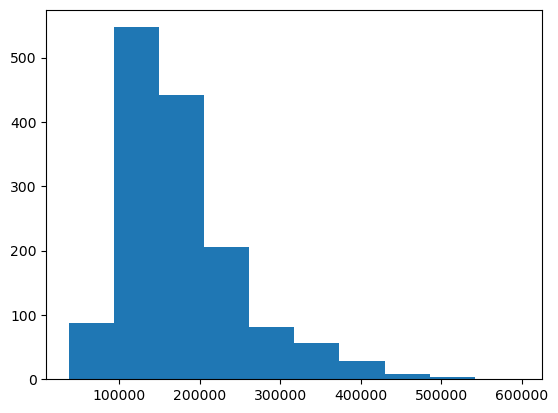

In [34]:
plt.hist(np.expm1(model.predict(df)));

In [35]:
np.expm1(model.predict(df.loc[[0]])[0])

114069.54522665584

In [36]:
# Export requested results
output = pd.DataFrame({'Id': range(1461, 1461 + len(df)), 'SalePrice': np.expm1(model.predict(df))})
output.to_csv('predictios_house_prices.csv', index=False)
output.head()

,Id,SalePrice
0,1461,114069.545227
1,1462,161769.324836
2,1463,172437.323361
3,1464,187235.865161
4,1465,210082.709373


In [37]:
output.tail()

,Id,SalePrice
1454,2915,82310.059196
1455,2916,85638.510563
1456,2917,140969.976781
1457,2918,118418.435970
1458,2919,222722.223658
